## Data Visualization - relevant examples
### BIOINF 575 - Fall 2023


____

#### `matplotlib` - powerful basic plotting library
https://matplotlib.org/stable/gallery/index.html   
https://matplotlib.org/stable/contents.html    
https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html    

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like MATLAB. <br>
Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes.<br>
"axes" in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).



**Useful resources:**      
https://github.com/pandas-dev/pandas/blob/v0.25.0/pandas/plotting/_core.py#L504-L1533    
https://matplotlib.org
https://matplotlib.org/tutorials/  
https://matplotlib.org/stable/tutorials/introductory/quick_start.html
https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
https://matplotlib.org/stable/tutorials/introductory/lifecycle.html      
https://github.com/rougier/matplotlib-tutorial     
https://www.tutorialspoint.com/matplotlib/matplotlib_pyplot_api.htm    
https://realpython.com/python-matplotlib-guide/    
https://github.com/matplotlib/AnatomyOfMatplotlib    
https://www.w3schools.com/python/matplotlib_pyplot.asp   
http://scipy-lectures.org/intro/matplotlib/index.html

```python 
%matplotlib inline
```
Magic command to show plots in the notebook.
Using this magic command, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

Starting with IPython 5.0 and matplotlib 2.0 you can avoid the use of IPython’s specific magic and use matplotlib.pyplot.ion()/matplotlib.pyplot.ioff() which have the advantages of working outside of IPython as well.

https://ipython.readthedocs.io/en/stable/interactive/plotting.html

____________

### `seaborn` - dataset-oriented plotting

Seaborn is a library that specializes in making *prettier* `matplotlib` plots of statistical data. <br>
- It is built on top of matplotlib and closely integrated with pandas data structures.    
- It needs a data object from where it will extract the information for the plot in different parameters.



**Useful resources:**     
https://seaborn.pydata.org/introduction.html<br>
https://python-graph-gallery.com/seaborn/   
https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
https://seaborn.pydata.org/tutorial/distributions.html


In [ ]:
import seaborn as sns

____

### `plotnine` - grammar of graphics - R ggplot2 in python

plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot.

Plotting with a grammar is powerful, it makes custom (and otherwise complex) plots are easy to think about and then create, while the simple plots remain simple.



https://plotnine.readthedocs.io/en/stable/api.html   
https://plotnine.readthedocs.io/en/stable/   
http://cmdlinetips.com/2018/05/plotnine-a-python-library-to-use-ggplot2-in-python/  
https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-altering-colors.html   
https://datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python/   
https://realpython.com/ggplot-python/



### Run the following line in a terminal window to install the library
#### This should have been done during the first session of the class so try the second cell first to see if the import gives any error

In [ ]:
# pip install plotnine

In [ ]:
from plotnine import *

_______

#### `plotly` - makes interactive graphs
#### This is more of a demo


https://plot.ly/python/getting-started/

Run in jupyter notebook or in a termina window without the !

In [ ]:
#!pip install plotly

In [ ]:
#!pip install ipywidgets

In [ ]:
import plotly.graph_objects as go
#from plotly.offline import iplot

_____

Tutorials:
    
* https://www.geeksforgeeks.org/data-visualization-with-python/
* https://github.com/moshi4/pyCirclize

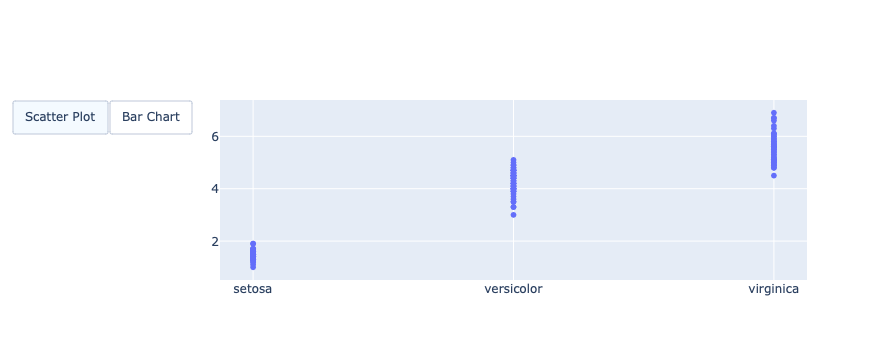

In [26]:
import plotly.graph_objects as px
import pandas as pd
 
# reading the database
data = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

 
 
plot = px.Figure(data=[px.Scatter(
    x=data['species'],
    y=data['petal_length'],
    mode='markers')
])
 
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"type": "scatter"}],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "bar"}],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
        ),
    ]
)
 
plot.show()

#### Volcano plot of differentially expressed genes

In [ ]:
#!pip install bioinfokit

In [35]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
df = analys.get_data('volcano').data
print(df.head(2))


visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value')
# plot will be saved in same directory (volcano.png)
# set parameter show=True, if you want view the image instead of saving


          GeneNames    log2FC       p-value
0  LOC_Os09g01000.1 -1.886539  1.250000e-55
1  LOC_Os12g42876.1  3.231611  1.050000e-55


          GeneNames    log2FC       p-value
0  LOC_Os09g01000.1 -1.886539  1.250000e-55
1  LOC_Os12g42876.1  3.231611  1.050000e-55


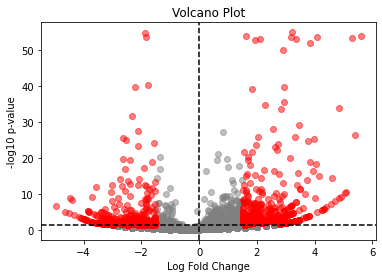

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = analys.get_data('volcano').data
print(data.head(2))

# Calculate log fold change and -log10 p-value
data['log_fold_change'] = data['log2FC']
data['pvalue'] = data['p-value']
data['neg_log_pvalue'] = -np.log10(data['p-value'])

# Define thresholds for significant genes
fold_change_threshold = 1.5
pvalue_threshold = 0.05

# Split data into significant and non-significant genes
signif_genes = data[(data['log_fold_change'].abs() >= fold_change_threshold) & (data['pvalue'] <= pvalue_threshold)]
non_signif_genes = data[(data['log_fold_change'].abs() < fold_change_threshold) | (data['pvalue'] > pvalue_threshold)]

# Create volcano plot
fig, ax = plt.subplots()
ax.scatter(non_signif_genes['log_fold_change'], non_signif_genes['neg_log_pvalue'], color='gray', alpha=0.5)
ax.scatter(signif_genes['log_fold_change'], signif_genes['neg_log_pvalue'], color='red', alpha=0.5)
ax.axvline(x=0, color='black', ls='--')
ax.axhline(y=-np.log10(pvalue_threshold), color='black', ls='--')
ax.set_xlabel('Log Fold Change')
ax.set_ylabel('-log10 p-value')

plt.title('Volcano Plot')
plt.show()